#Build Neural Network from Scratch
### ***Project 1***
##  Objective
The goal is to implement a fully connected feedforward neural network **from scratch** using only NumPy.  
We will apply it to the **Breast Cancer Wisconsin dataset** to classify tumors as malignant or benign.  

##  Steps
1. **Data Preparation**
   - Load dataset from scikit-learn.
   - Standardize features (zero mean, unit variance).
   - Split into train/test sets.

2. **Neural Network Implementation**
   - Initialize weights and biases randomly.
   - Implement forward propagation:
     - Linear transformation: \( Z = W \cdot X + b \)
     - Activation functions: ReLU (hidden layers), Sigmoid (output).
   - Compute loss: Binary Cross-Entropy.
   - Implement backward propagation (gradient descent).
   - Update parameters.

3. **Training**
   - Run multiple epochs.
   - Track loss and accuracy.

4. **Evaluation**
   - Test accuracy on unseen data.
   - Compare to scikit-learn Logistic Regression baseline.

## 📊 Expected Results
- Accuracy: ~95% on Breast Cancer dataset.
- Loss curve decreasing over epochs.
- Demonstration of NN working without PyTorch/TensorFlow.

## 🧬 Biomedical Relevance
This project shows how to implement a **neural network from scratch** and apply it to a **real biomedical dataset**.  
Such methods can extend to other health-related classification problems (genomics, imaging, diagnostics).


In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = load_breast_cancer()
X, y = data.data, data.target.reshape(-1, 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

def sigmoid_derivative(a):
    return a * (1 - a)

def binary_cross_entropy(y_true, y_pred):
    m = y_true.shape[0]
    return -np.mean(y_true*np.log(y_pred+1e-8) + (1-y_true)*np.log(1-y_pred+1e-8))

input_dim = X_train.shape[1]
hidden_dim = 16
output_dim = 1

np.random.seed(42)
W1 = np.random.randn(input_dim, hidden_dim) * 0.01
b1 = np.zeros((1, hidden_dim))
W2 = np.random.randn(hidden_dim, output_dim) * 0.01
b2 = np.zeros((1, output_dim))

lr = 0.01
epochs = 500
for epoch in range(epochs):

    Z1 = np.dot(X_train, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)

    loss = binary_cross_entropy(y_train, A2)

    m = y_train.shape[0]
    dZ2 = A2 - y_train
    dW2 = (1/m) * np.dot(A1.T, dZ2)
    db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1/m) * np.dot(X_train.T, dZ1)
    db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)

    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

Z1 = np.dot(X_test, W1) + b1
A1 = relu(Z1)
Z2 = np.dot(A1, W2) + b2
A2 = sigmoid(Z2)
y_pred = (A2 > 0.5).astype(int)

acc = np.mean(y_pred == y_test)
print(f"Test Accuracy: {acc:.4f}")


Epoch 0, Loss: 0.6928
Epoch 100, Loss: 0.6773
Epoch 200, Loss: 0.6601
Epoch 300, Loss: 0.6201
Epoch 400, Loss: 0.5166
Test Accuracy: 0.9561


# Build a Neural Network from Scratch on MNIST
### ***Project 2***
##  Objective
Implement a simple feedforward neural network **from scratch with NumPy** and apply it to the **MNIST dataset** (28x28 grayscale images of handwritten digits 0–9).  

##  Steps
1. **Data Preparation**
   - Load MNIST dataset (from Keras or sklearn).
   - Normalize pixel values (0–1).
   - One-hot encode labels.

2. **Neural Network Implementation**
   - Input layer: 784 (28×28 pixels flattened).
   - Hidden layer(s): ReLU activation.
   - Output layer: 10 neurons (softmax for digit classification).
   - Loss function: Categorical Cross-Entropy.
   - Backpropagation with gradient descent.

3. **Training**
   - Train for several epochs with mini-batches.
   - Track training loss and accuracy.

4. **Evaluation**
   - Test on 10,000 unseen images.
   - Report accuracy and show sample predictions.

## 📊 Expected Results
- Accuracy: ~92–95% with one hidden layer.
- Training loss decreases smoothly.
- Correct digit predictions on test samples.

## 🧬 Relevance
Although MNIST is not biomedical, this project demonstrates:
- Ability to **implement neural networks from scratch**.
- Handling of **image data**, which is essential for **medical imaging tasks** (tumor detection, radiology, histopathology, etc.).


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10, Loss: 0.3965
Epoch 2/10, Loss: 0.3409
Epoch 3/10, Loss: 0.3052
Epoch 4/10, Loss: 0.2808
Epoch 5/10, Loss: 0.2654
Epoch 6/10, Loss: 0.2513
Epoch 7/10, Loss: 0.2395
Epoch 8/10, Loss: 0.2300
Epoch 9/10, Loss: 0.2223
Epoch 10/10, Loss: 0.2157
Test Accuracy: 0.9652


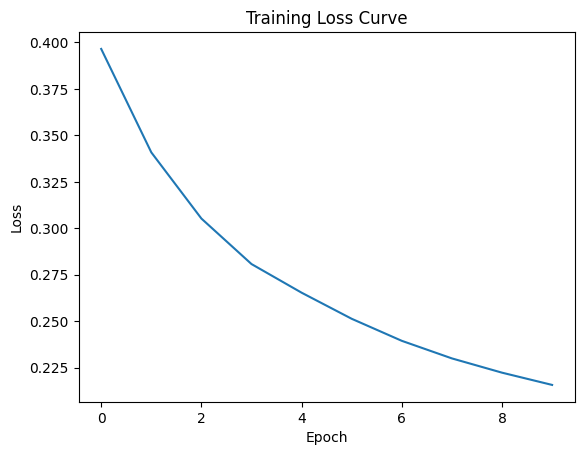

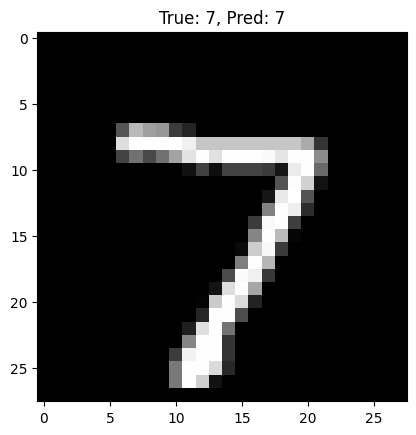

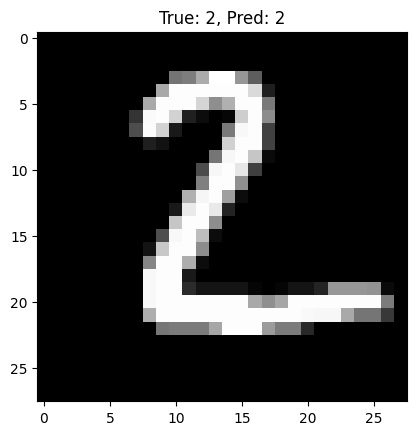

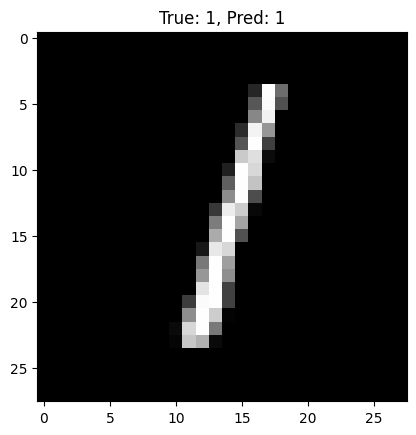

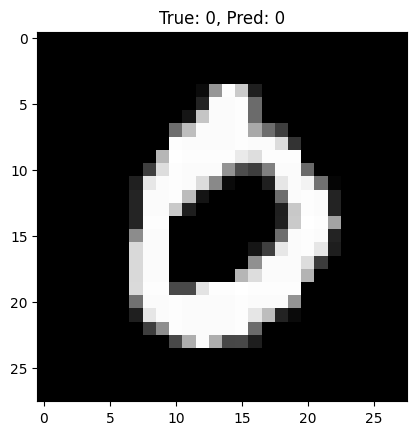

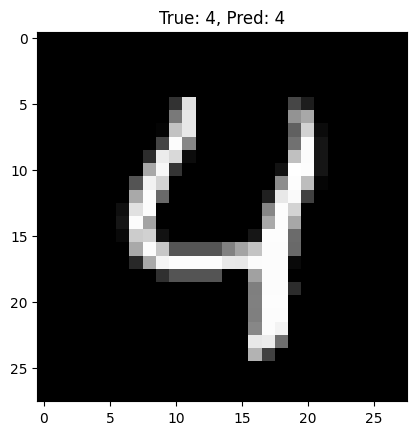

In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

encoder = OneHotEncoder(sparse_output=False)
y_train = encoder.fit_transform(y_train.reshape(-1, 1))
y_test = encoder.transform(y_test.reshape(-1, 1))

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def cross_entropy(y_true, y_pred):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred + 1e-8)) / m

input_dim = 784
hidden_dim = 128
output_dim = 10

np.random.seed(42)
W1 = np.random.randn(input_dim, hidden_dim) * 0.01
b1 = np.zeros((1, hidden_dim))
W2 = np.random.randn(hidden_dim, output_dim) * 0.01
b2 = np.zeros((1, output_dim))

lr = 0.1
epochs = 10
batch_size = 128
losses = []

for epoch in range(epochs):
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]

        Z1 = np.dot(X_batch, W1) + b1
        A1 = relu(Z1)
        Z2 = np.dot(A1, W2) + b2
        A2 = softmax(Z2)

        loss = cross_entropy(y_batch, A2)

        m = X_batch.shape[0]
        dZ2 = A2 - y_batch
        dW2 = (1/m) * np.dot(A1.T, dZ2)
        db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)

        dA1 = np.dot(dZ2, W2.T)
        dZ1 = dA1 * relu_derivative(Z1)
        dW1 = (1/m) * np.dot(X_batch.T, dZ1)
        db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)

        W1 -= lr * dW1
        b1 -= lr * db1
        W2 -= lr * dW2
        b2 -= lr * db2

    losses.append(loss)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")

Z1 = np.dot(X_test, W1) + b1
A1 = relu(Z1)
Z2 = np.dot(A1, W2) + b2
A2 = softmax(Z2)
y_pred = np.argmax(A2, axis=1)
y_true = np.argmax(y_test, axis=1)

accuracy = np.mean(y_pred == y_true)
print(f"Test Accuracy: {accuracy:.4f}")

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

for i in range(5):
    plt.imshow(X_test[i].reshape(28,28), cmap="gray")
    plt.title(f"True: {y_true[i]}, Pred: {y_pred[i]}")
    plt.show()
